In [13]:
import pandas as pd
from github import Github

def fetch_github_data(token, repos_list):
    g = Github(token)
    data = []
    
    for repo_str in repos_list:
        user, repo = repo_str.split(' / ')
        repo_obj = g.get_user(user).get_repo(repo)
        open_issues = repo_obj.get_issues(state='open')
        closed_issues = repo_obj.get_issues(state='closed')
        data.append({
            'repo': repo,
            'stars': repo_obj.stargazers_count,
            'open_issues': open_issues.totalCount,
            'closed_issues': closed_issues.totalCount
        })

    return pd.DataFrame(data)

In [15]:
import getpass

access_token = getpass.getpass("Enter your GitHub access token: ")

In [23]:
repos = [
    "git / git",
    "ansible / ansible",
    "pandas-dev / pandas",
    "keras-team / keras",
    "openssl / openssl",
    "python / cpython",
    "nodejs / node",
    "nextcloud / server",
    "pallets / flask",
    "tiangolo / fastapi",
    "mastodon / mastodon",
    "redis / redis",
    "Homebrew / brew",
    "rust-lang / rust",
    "scikit-learn / scikit-learn",
    "tensorflow / tensorflow",
    "neo4j / neo4j",
    "golang / go",
    "docker / compose",
    "docker / docker",
    "kubernetes / kubernetes",
]



In [24]:
data = fetch_github_data(access_token, repos)

In [25]:
data

,repo,stars,open_issues,closed_issues
0,git,46531,137,1166
1,ansible,57674,957,79842
2,pandas,38679,3510,50105
3,keras,58582,388,17798
4,openssl,21943,2210,18851
5,cpython,53941,8250,96887
6,node,95944,1723,45036
7,server,22723,2493,35181
8,flask,63278,1,4919
9,fastapi,59085,516,5147


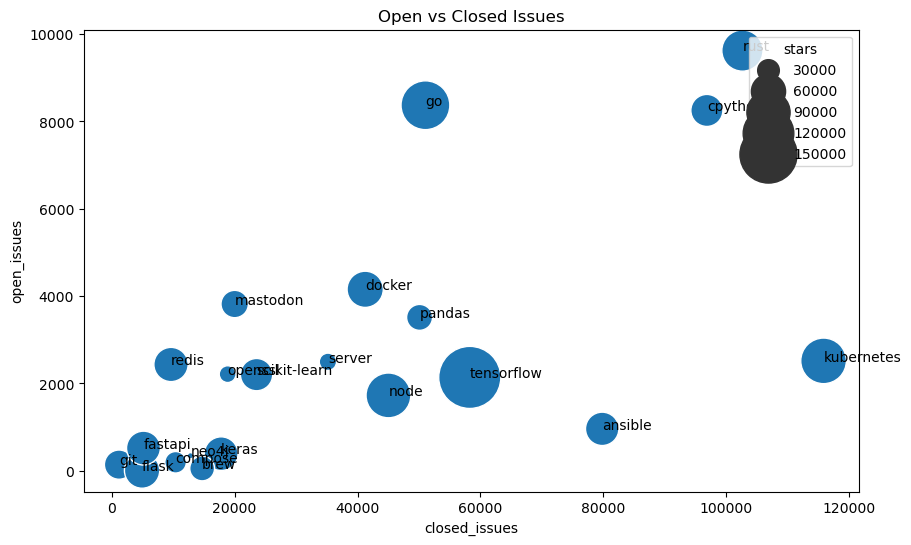

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_issues(df):
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(x='closed_issues', y='open_issues', size='stars', sizes=(20, 2000), data=df)

    # Add labels
    for i, txt in enumerate(df['repo']):
        plt.annotate(txt, (df['closed_issues'].iat[i], df['open_issues'].iat[i]))

    # Set the title
    plt.title('Open vs Closed Issues')

    # Show the plot
    plt.show()

# example usage
plot_issues(data)
